In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
train_df = pd.read_csv('train.csv')

In [94]:
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [95]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [6]:
X = train_df.drop('label', axis=1)

In [7]:
y = train_df['label']

In [8]:
X.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
X.columns

Index(['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=784)

In [10]:
y.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

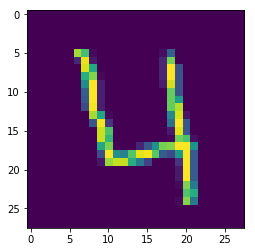

In [27]:
plt.imshow(X.loc[3].values.reshape(28,28))

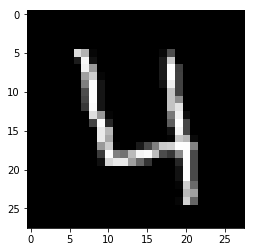

In [34]:
plt.imshow(X.loc[3].values.reshape(28,28), cmap='gray')

# Splitting training data

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.3, random_state=101)

# Tensorflow Estimator

In [90]:
import tensorflow as tf

In [91]:
X.columns

Index(['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=784)

In [92]:
feat_cols = []

for col in X.columns:
    feat_cols.append(tf.feature_column.numeric_column(col))

In [110]:
feat_cols

[NumericColumn(key='pixel0', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='pixel1', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='pixel2', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='pixel3', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='pixel4', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='pixel5', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='pixel6', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='pixel7', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='pixel8', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='pixel9', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),


In [111]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train, y=y_train, batch_size=1000, num_epochs=5, shuffle=True)

In [112]:
classifier = tf.estimator.DNNClassifier(hidden_units=[10,20], n_classes=10, feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpvujit009', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f6bc963e860>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [113]:
classifier.train(input_fn=input_func, steps=350)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpvujit009/model.ckpt.
INFO:tensorflow:loss = 41053.098, step = 1
INFO:tensorflow:global_step/sec: 1.10944
INFO:tensorflow:loss = 2279.937, step = 101 (90.139 sec)
INFO:tensorflow:Saving checkpoints for 147 into /tmp/tmpvujit009/model.ckpt.
INFO:tensorflow:Loss for final step: 2257.4712.


# Model Evaluation

In [114]:
pred_fn = tf.estimator.inputs.pandas_input_fn(x=X_cv, batch_size=len(X_cv), shuffle=False)

In [115]:
note_preds = list(classifier.predict(input_fn=pred_fn))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpvujit009/model.ckpt-147
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [116]:
note_preds[1000]

{'logits': array([ 0.06851488,  0.18735306,  0.07576421, -0.05240191,  0.05431611,
        -0.00896324,  0.06628496,  0.11870972,  0.05187254,  0.06318329],
       dtype=float32),
 'probabilities': array([0.10041828, 0.11308983, 0.10114889, 0.08898141, 0.09900254,
        0.09293183, 0.10019461, 0.10558741, 0.09876091, 0.09988432],
       dtype=float32),
 'class_ids': array([1]),
 'classes': array([b'1'], dtype=object)}

In [117]:
preds = []

for pred in note_preds:
    preds.append(pred['class_ids'][0])

In [118]:
preds[1]

3

In [119]:
from sklearn.metrics import classification_report, confusion_matrix

In [120]:
print(confusion_matrix(y_cv, preds))
print('\n')
print(classification_report(y_cv, preds))

[[   0 1212    0    1    0    0    0    0    0    0]
 [   0 1422    0    0    0    0    0    0    0    0]
 [   0 1253    0    4    0    0    0    1    0    0]
 [   0  978    0  298    0    0    0    7    0    1]
 [   0 1195    0    6    0    0    0    0    0    8]
 [   0 1106    0   12    0    0    0    1    0    2]
 [   0 1242    0    0    0    0    0    0    0    0]
 [   0 1309    0    5    0    0    0    0    1    0]
 [   0 1225    0    2    0    0    0    0    0    0]
 [   0 1308    0    1    0    0    0    0    0    0]]


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1213
           1       0.12      1.00      0.21      1422
           2       0.00      0.00      0.00      1258
           3       0.91      0.23      0.37      1284
           4       0.00      0.00      0.00      1209
           5       0.00      0.00      0.00      1121
           6       0.00      0.00      0.00      1242
           7       0.00      0.00 

/home/harsh/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/harsh/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/harsh/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
